In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [23]:
data = pd.read_csv("goog.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

In [25]:
split = int(len(scaled_data)*0.8)
training_data = scaled_data[:split]
testing_data = scaled_data[split:]

In [26]:
print(training_data.shape)

(48, 1)


In [27]:
print(testing_data.shape)

(13, 1)


In [28]:
def create_seq(data, steps=6):
    x = []
    y = []
    for i in range(len(data)-steps):
        x.append(data[i:i+steps])
        y.append(data[i+steps])
    return np.array(x), np.array(y)

x_train, y_train = create_seq(training_data)
x_test, y_test = create_seq(testing_data)

In [29]:
print(x_train.shape)
print(x_train.shape[1])

(42, 6, 1)
6


In [30]:
print(y_train.shape)

(42, 1)


In [31]:
# print(x_train)

In [32]:
# print(y_train)

In [33]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 6, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(x_train, y_train, batch_size=4, epochs=50)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1700
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311  
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0288 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 
Epoch 

In [35]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


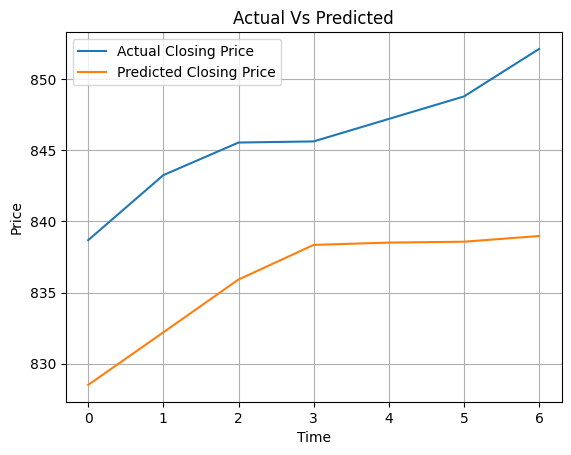

In [36]:
plt.plot(y_test, label="Actual Closing Price")
plt.plot(y_pred, label="Predicted Closing Price")
plt.title("Actual Vs Predicted")
plt.grid(True)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

MAE :  10.025059228236598
MSE :  103.41209791571764
RMSE :  10.169173905274588


In [38]:
last_6_days = data["Close"][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1,1))

X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)


In [39]:
pred_price = model.predict(X_pred)
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for the next day: ', pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Predicted price for the next day:  [[840.6658]]
